In [11]:
!pip install yfinance

import yfinance

dataframe = yfinance.download("DIS", 
                              "2010-01-01", 
                              "2020-09-01", 
                              auto_adjust=True)

dataframe = dataframe[["Close"]]

dataframe = dataframe.dropna()

dataframe

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2010-01-04,27.933924
2010-01-05,27.864237
2010-01-06,27.716166
2010-01-07,27.724878
2010-01-08,27.768419
...,...
2020-08-25,129.789993
2020-08-26,132.179993
2020-08-27,133.729996


Text(0.5, 1.0, 'Disney Stock - 2010-2020')

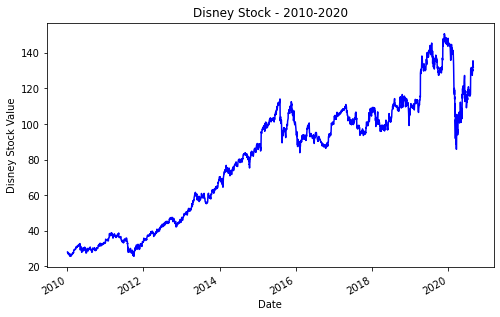

In [12]:
import matplotlib.pyplot as pyplot

dataframe.Close.plot(figsize = (8, 5), 
                     color   = "b")

pyplot.ylabel("Disney Stock Value")

pyplot.title("Disney Stock - 2010-2020")

In [13]:
dataframe["five_days_moving_average"]   = dataframe["Close"].rolling(window=5).mean()

dataframe["twenty_days_moving_average"] = dataframe["Close"].rolling(window=20).mean()

dataframe = dataframe.dropna()

X = dataframe[["five_days_moving_average", 
               "twenty_days_moving_average"]]

dataframe["value_next_day"]             = dataframe["Close"].shift(-1)

dataframe = dataframe.dropna()

y = dataframe["value_next_day"]

y

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Date
2010-02-01     26.113466
2010-02-02     26.784159
2010-02-03     25.843452
2010-02-04     25.730217
2010-02-05     25.677956
                 ...    
2020-08-24    129.789993
2020-08-25    132.179993
2020-08-26    133.729996
2020-08-27    135.539993
2020-08-28    131.869995
Name: value_next_day, Length: 2664, dtype: float64

In [14]:
split_index = 0.8

split_index = split_index * len(dataframe)

split_index = int(split_index) 

X_train = X[:split_index]
y_train = y[:split_index]

X_test  = X[split_index:]
y_test  = y[split_index:] 

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model = model.fit(X_train, 
                  y_train)

five_day_moving_average   = model.coef_[0]

twenty_day_moving_average = model.coef_[1]

print(five_day_moving_average)
print(twenty_day_moving_average)

constant = model.intercept_

print(constant)

1.1527716937153407
-0.1539653241539895
0.15779330562186544


Text(0, 0.5, 'Disney Stock Value')

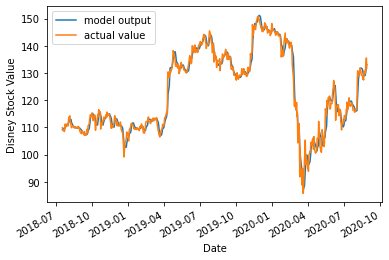

In [16]:
test_output = model.predict(X_test)

import pandas

y_test = y[(split_index - 1):]

test_output = pandas.DataFrame(test_output,
                              index = y_test.index,
                              columns = ["value"])

test_output.plot()

y_test.plot()

pyplot.legend(["model output",
               "actual value"])

pyplot.ylabel("Disney Stock Value")

In [17]:
score = model.score(X[split_index:],
                    y[(split_index - 1):])

score = score * 100

print(score)

97.4151561109521


Text(0, 0.5, 'Cumulative Returns')

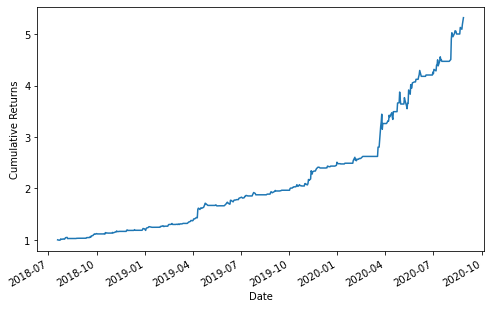

In [18]:
stock = pandas.DataFrame()

stock["value"] = dataframe[split_index:]["Close"]

stock["predicted_tomorrow"] = test_output

stock["actual_tomorrow"] = y_test

stock["returns"] = stock["value"].pct_change().shift(-1)

import numpy

stock["strategy"] = numpy.where(stock.predicted_tomorrow.shift(1) < stock.predicted_tomorrow,
                                1,
                                0)

stock["strategy_returns"] = stock.strategy * stock["returns"]

cumulative_product = (stock["strategy_returns"] + 1).cumprod()

cumulative_product.plot(figsize = (8, 5))

pyplot.ylabel("Cumulative Returns")

In [25]:
dataset = yfinance.download("DIS",
                            "2010-01-01",
                            "2020-09-01",
                            auto_adjust = True)

dataset["five_day_average"]   = dataset["Close"].rolling(window = 5).mean()

dataset["twenty_day_average"] = dataset["Close"].rolling(window = 20).mean()

dataset = dataset.dropna()

dataset["predicted_stock_value"] = model.predict(dataset[["five_day_average",
                                                       "twenty_day_average"]])

dataset["strategy"] = numpy.where(dataset.predicted_stock_value.shift(1) < dataset.predicted_stock_value,
                                 "Buy",
                                 "Hold/Sell")

print(dataset)

[*********************100%***********************]  1 of 1 completed
Date
2010-02-01     25.712797
2010-02-02     26.113466
2010-02-03     26.784159
2010-02-04     25.843452
2010-02-05     25.730217
                 ...    
2020-08-25    129.789993
2020-08-26    132.179993
2020-08-27    133.729996
2020-08-28    135.539993
2020-08-31    131.869995
Name: Close, Length: 2665, dtype: float64
                  Open        High  ...  predicted_stock_value   strategy
Date                                ...                                  
2010-02-01   25.782479   25.930555  ...              25.636191  Hold/Sell
2010-02-02   25.721504   26.139598  ...              25.714466        Buy
2010-02-03   26.061204   26.888683  ...              26.009951        Buy
2010-02-04   26.374781   26.557697  ...              26.088630        Buy
2010-02-05   25.808608   25.991525  ...              26.101978        Buy
...                ...         ...  ...                    ...        ...
2020-08-25  130.8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
